<a href="https://colab.research.google.com/github/ChintPatel/CMPE-258-HW4/blob/main/deep_learning_fundamentals_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [ ]:
!python --version

Python 3.11.11


In [ ]:
!pip list | grep tensor

pytensor                           2.27.1
safetensors                        0.5.3
tensorboard                        2.18.0
tensorboard-data-server            0.7.2
tensorflow                         2.18.0
tensorflow-datasets                4.9.7
tensorflow-hub                     0.16.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.16.1
tensorflow-probability             0.25.0
tensorflow-text                    2.18.1
tensorstore                        0.1.72


In [ ]:
!pip list | grep torch

torch                              2.5.1+cu124
torchaudio                         2.5.1+cu124
torchsummary                       1.5.1
torchvision                        0.20.1+cu124


In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

/bin/bash: line 1: nvidia-smi: command not found


## Basic numerical computing

In [ ]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
X.shape, x.shape

((3, 2), (2,))

In [ ]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.99638243, 0.63782019],
       [0.09535187, 0.79487129],
       [0.96812157, 0.05561322]])

In [ ]:
X > 0.5

array([[ True,  True],
       [False,  True],
       [ True, False]])

In [ ]:
X[X > 0.5] = 1
X

array([[1.        , 1.        ],
       [0.09535187, 1.        ],
       [1.        , 0.05561322]])

## Basic plotting

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

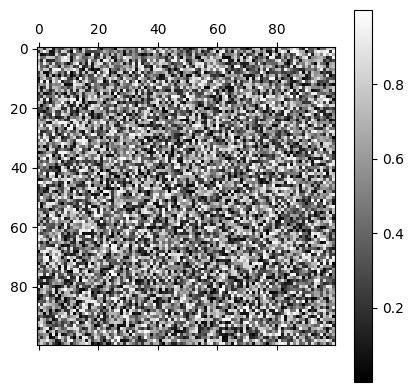

In [ ]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

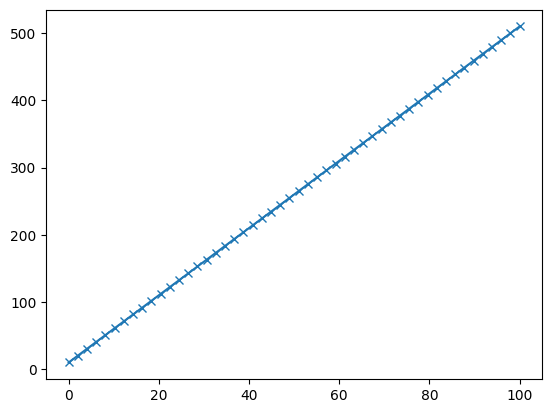

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


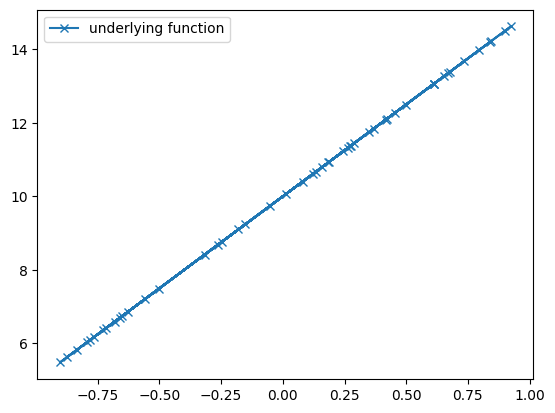

In [ ]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

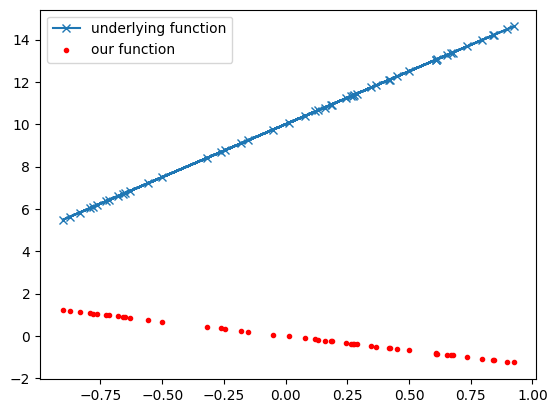

In [ ]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [ ]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 118.78234033265113


### Add back propagation

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

109.50093132489866
70.89990780816494


### Train using gradient descent!

Epoch 0, loss 104.68632988664032
Epoch 5, loss 11.658203341069848
Epoch 10, loss 1.5048857602554446
Epoch 15, loss 0.2970705134120737
Epoch 20, loss 0.10278605992133744
Epoch 25, loss 0.047957242733226414
Epoch 30, loss 0.024360744918073787
Epoch 35, loss 0.0126102880395012


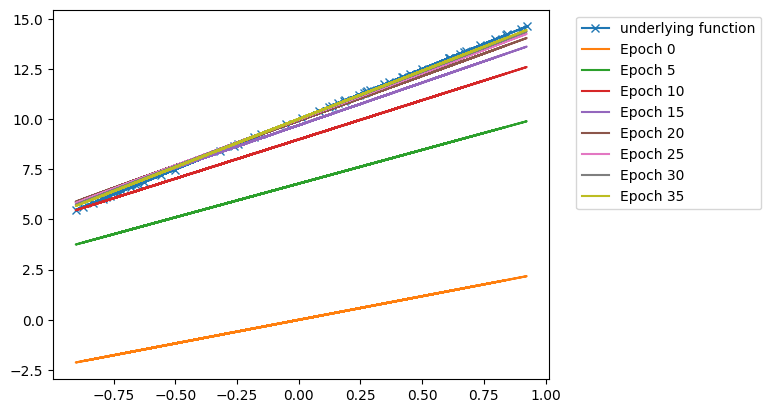

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


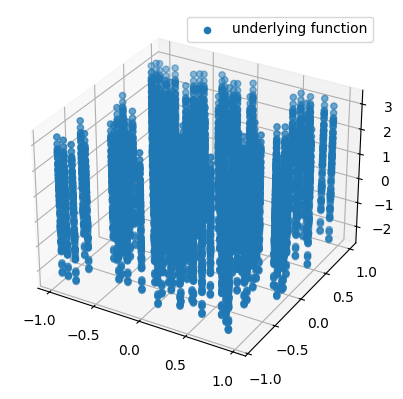

In [ ]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

3.5241435515364934


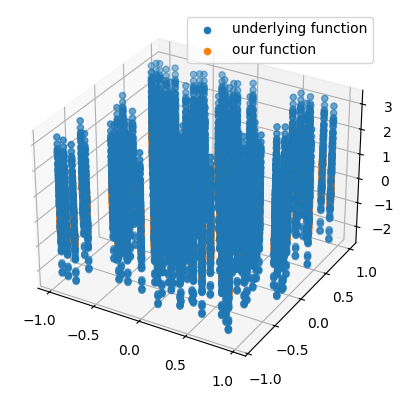

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 3.5241435515364934
Epoch 1, loss 3.008681496370043
Epoch 2, loss 2.5762005767777847
Epoch 3, loss 2.2107932773739454
Epoch 4, loss 1.9003797710141515
Epoch 5, loss 1.6355873470422995
Epoch 6, loss 1.4089986589927435
Epoch 7, loss 1.2146405544573622
Epoch 8, loss 1.0476308600690607
Epoch 9, loss 0.9039297379790305
Epoch 10, loss 0.7801609998838862
Epoch 11, loss 0.6734808290505033
Epoch 12, loss 0.581479130094379
Epoch 13, loss 0.5021037423141884
Epoch 14, loss 0.4336010017635212
Epoch 15, loss 0.37446825149902196
Epoch 16, loss 0.32341528306361306
Epoch 17, loss 0.27933260447710995
Epoch 18, loss 0.2412650371114935
Epoch 19, loss 0.2083895526365341


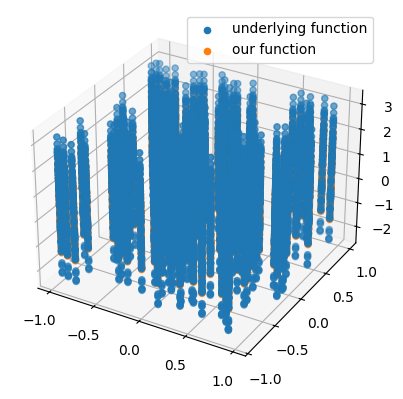

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


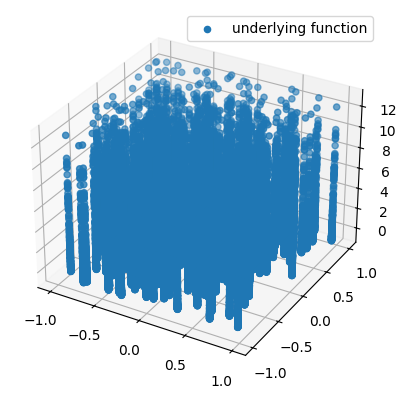

In [ ]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 20.151043375356068
Epoch 1, loss 16.97036740622376
Epoch 2, loss 14.53057695765307
Epoch 3, loss 12.612399937402463
Epoch 4, loss 11.070211493416286
Epoch 5, loss 9.805993254979732
Epoch 6, loss 8.752673227121152
Epoch 7, loss 7.863445196729061
Epoch 8, loss 7.104902413883694
Epoch 9, loss 6.4526067690952855
Epoch 10, loss 5.888215185622025
Epoch 11, loss 5.397603499384229
Epoch 12, loss 4.969630882468328
Epoch 13, loss 4.595316982304514
Epoch 14, loss 4.267286184560647
Epoch 15, loss 3.979385807190496
Epoch 16, loss 3.7264184403927043
Epoch 17, loss 3.5039499629629995
Epoch 18, loss 3.3081683808300646
Epoch 19, loss 3.135777343079049
Epoch 20, loss 2.983913773270599
Epoch 21, loss 2.8500826417625897
Epoch 22, loss 2.73210421912363
Epoch 23, loss 2.628070650918308
Epoch 24, loss 2.536309672866905
Epoch 25, loss 2.4553539293042963
Epoch 26, loss 2.3839147861240986
Epoch 27, loss 2.3208598181259346
Epoch 28, loss 2.265193348612751
Epoch 29, loss 2.2160395574670035
Epoch 30,

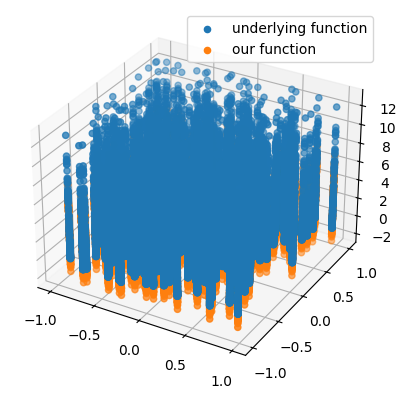

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

17.11273953433503


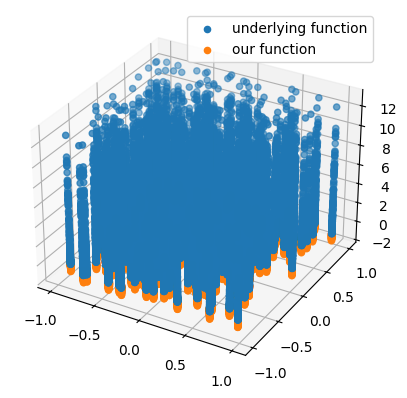

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

10.640782124259648
6.754341632813457


Epoch 0, loss 6.754341632813457
Epoch 1, loss 3.7943739658319133
Epoch 2, loss 2.1413060655689238
Epoch 3, loss 1.4677136142618659
Epoch 4, loss 1.1418637329723043
Epoch 5, loss 0.9385853247715101
Epoch 6, loss 0.7964833301897104
Epoch 7, loss 0.6914204840843218
Epoch 8, loss 0.6103304696280331
Epoch 9, loss 0.5441500014327194
Epoch 10, loss 0.4905798644958915
Epoch 11, loss 0.4463833883592689
Epoch 12, loss 0.4074635992531399
Epoch 13, loss 0.3732161210158445
Epoch 14, loss 0.34384762105608524
Epoch 15, loss 0.318093395223232
Epoch 16, loss 0.29589866940907106
Epoch 17, loss 0.27670214319247677
Epoch 18, loss 0.25998648522644496
Epoch 19, loss 0.24532063418465305
Epoch 20, loss 0.2325688012730466
Epoch 21, loss 0.2213602097774801
Epoch 22, loss 0.21115513609139086
Epoch 23, loss 0.20214069977974547
Epoch 24, loss 0.19401246535937805
Epoch 25, loss 0.18688075723466432
Epoch 26, loss 0.1806045052631498
Epoch 27, loss 0.17499878792624732
Epoch 28, loss 0.16984572294461522
Epoch 29, loss 

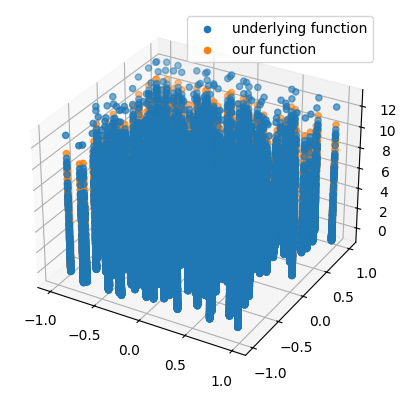

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(13.5027, grad_fn=<MseLossBackward0>)


In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(13.5027, grad_fn=<MseLossBackward0>)
tensor(9.2949, grad_fn=<MseLossBackward0>)


tensor(9.2949, grad_fn=<MseLossBackward0>)
tensor(6.7035, grad_fn=<MseLossBackward0>)
tensor(4.9689, grad_fn=<MseLossBackward0>)
tensor(3.8703, grad_fn=<MseLossBackward0>)
tensor(3.0478, grad_fn=<MseLossBackward0>)
tensor(2.4057, grad_fn=<MseLossBackward0>)
tensor(1.9197, grad_fn=<MseLossBackward0>)
tensor(1.5587, grad_fn=<MseLossBackward0>)
tensor(1.2853, grad_fn=<MseLossBackward0>)
tensor(1.0868, grad_fn=<MseLossBackward0>)
tensor(0.9361, grad_fn=<MseLossBackward0>)
tensor(0.8224, grad_fn=<MseLossBackward0>)
tensor(0.7330, grad_fn=<MseLossBackward0>)
tensor(0.6656, grad_fn=<MseLossBackward0>)
tensor(0.6124, grad_fn=<MseLossBackward0>)
tensor(0.5685, grad_fn=<MseLossBackward0>)
tensor(0.5325, grad_fn=<MseLossBackward0>)
tensor(0.5017, grad_fn=<MseLossBackward0>)
tensor(0.4760, grad_fn=<MseLossBackward0>)
tensor(0.4539, grad_fn=<MseLossBackward0>)
tensor(0.4347, grad_fn=<MseLossBackward0>)
tensor(0.4176, grad_fn=<MseLossBackward0>)
tensor(0.4019, grad_fn=<MseLossBackward0>)
tensor(0.38

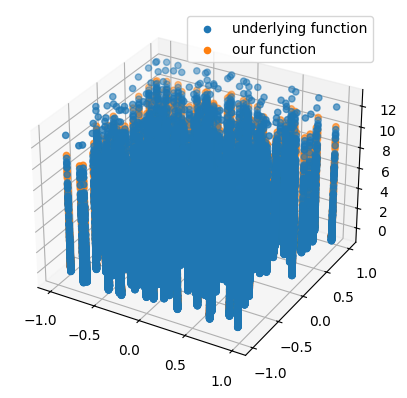

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ regression (Dense)                   │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1809  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1381 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8950 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5315 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3387 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2521 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2613  
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1646 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1616 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2376 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


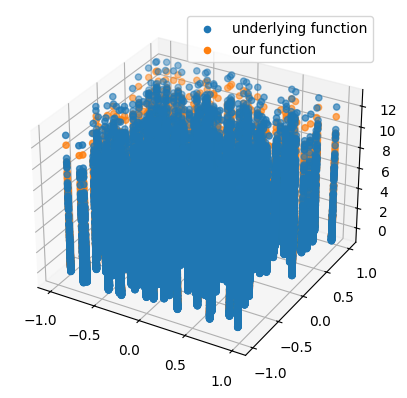

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))